In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
base_path = '/content/drive/My Drive/Quantum_Computers/QItaly_Challenge_Wizard/Datasets/unique_attendance_15/'

# Define paths for each dataset

path_1 = base_path + 'presenza_15_010824-140824.csv'  # Data from Aug 1, 2024 to Aug 14, 2024
path_2 = base_path + 'presenza_15_150824-310824.csv'  # Data from 15 Aug, 2024 to Aug 31, 2024
path_3 = base_path + 'presenza_15_010924-140924.csv'  # Data from Sep 1, 2024 to Sep 14, 2024
path_4 = base_path + 'presenza_15_150924_300924.csv'  # Data from Sep 15, 2024 to Sep 30, 2024
path_5 = base_path + 'presenza_15_011024-081024.csv'  # Data from Oct 1, 2024 to Oct 8, 2024

# Load the datasets into pandas DataFrames
df1 = pd.read_csv(path_1)
df2 = pd.read_csv(path_2)
df3 = pd.read_csv(path_3)
df4 = pd.read_csv(path_4)
df5 = pd.read_csv(path_5)

# Display the first few rows of one of the datasets as an example
# df1.size

In [12]:
import pandas as pd

unique_area_analisi = df1['areaAnalisi'].unique()
print(unique_area_analisi)
# Assuming the datasets are already loaded:
datasets = [df1, df2, df3, df4, df5]  # Corresponding to path_1, path_2, ..., path_5

# Function to filter by 'areaAnalisi' column for all areas and return as dictionary
def filter_by_area(df):
    return {
        'df00': df[df['areaAnalisi'].str.contains('Intero Comune')],
        'df0': df[df['areaAnalisi'].str.contains('Cagliari - 000')],
        'df1': df[df['areaAnalisi'].str.contains('Cagliari - 001')],
        'df2': df[df['areaAnalisi'].str.contains('Cagliari - 002')],
        'df3': df[df['areaAnalisi'].str.contains('Cagliari - 003')],
        'df4': df[df['areaAnalisi'].str.contains('Cagliari - 004')],
        'df5': df[df['areaAnalisi'].str.contains('Cagliari - 005')],
        'df6': df[df['areaAnalisi'].str.contains('Cagliari - 006')],
        'df7': df[df['areaAnalisi'].str.contains('Cagliari - 007')],
        'df8': df[df['areaAnalisi'].str.contains('Cagliari - 008')],
        'df9': df[df['areaAnalisi'].str.contains('Cagliari - 009')],
        'df10': df[df['areaAnalisi'].str.contains('Cagliari - 010')],
        'df11': df[df['areaAnalisi'].str.contains('Cagliari - 011')],
        'df12': df[df['areaAnalisi'].str.contains('Cagliari - 012')],
    }

# Dictionary to hold all the new datasets
df_dict = {}

# Loop through datasets (df1 to df5)
for i, dataset in enumerate(datasets, start=1):
    # Apply filter_by_area function to each dataset
    filtered_data = filter_by_area(dataset)
    key = f"df_{i}_00"

    # Store the dataset in the dictionary
    df_dict[key] = filtered_data[f"df00"]
    # Loop through the filtered datasets (df0 to df12)
    for j in range(13):
        # Create the variable name dynamically as df_X_Y
        key = f"df_{i}_{j}"

        # Store the dataset in the dictionary
        df_dict[key] = filtered_data[f"df{j}"]

# Now you can access the datasets using df_dict['df_1_0'], df_dict['df_2_3'], etc.
# Example: Print the first few rows of df_1_0



['Intero Comune' 'Cagliari - 011' 'Cagliari - 004' 'Cagliari - 009'
 'Cagliari - 006' 'Cagliari - 007' 'Cagliari - 005' 'Cagliari - 012'
 'Cagliari - 008' 'Cagliari - 002' 'Cagliari - 003' 'Cagliari - 010'
 'Cagliari - 001' 'Cagliari - 000']


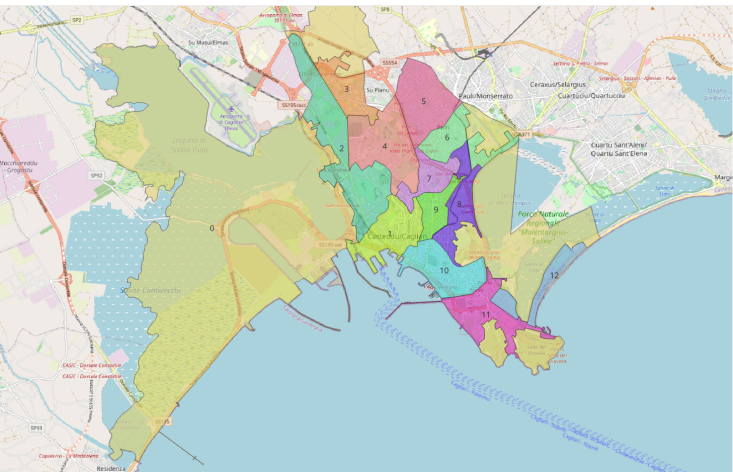

['datetime', 'value', 'areaAnalisi']


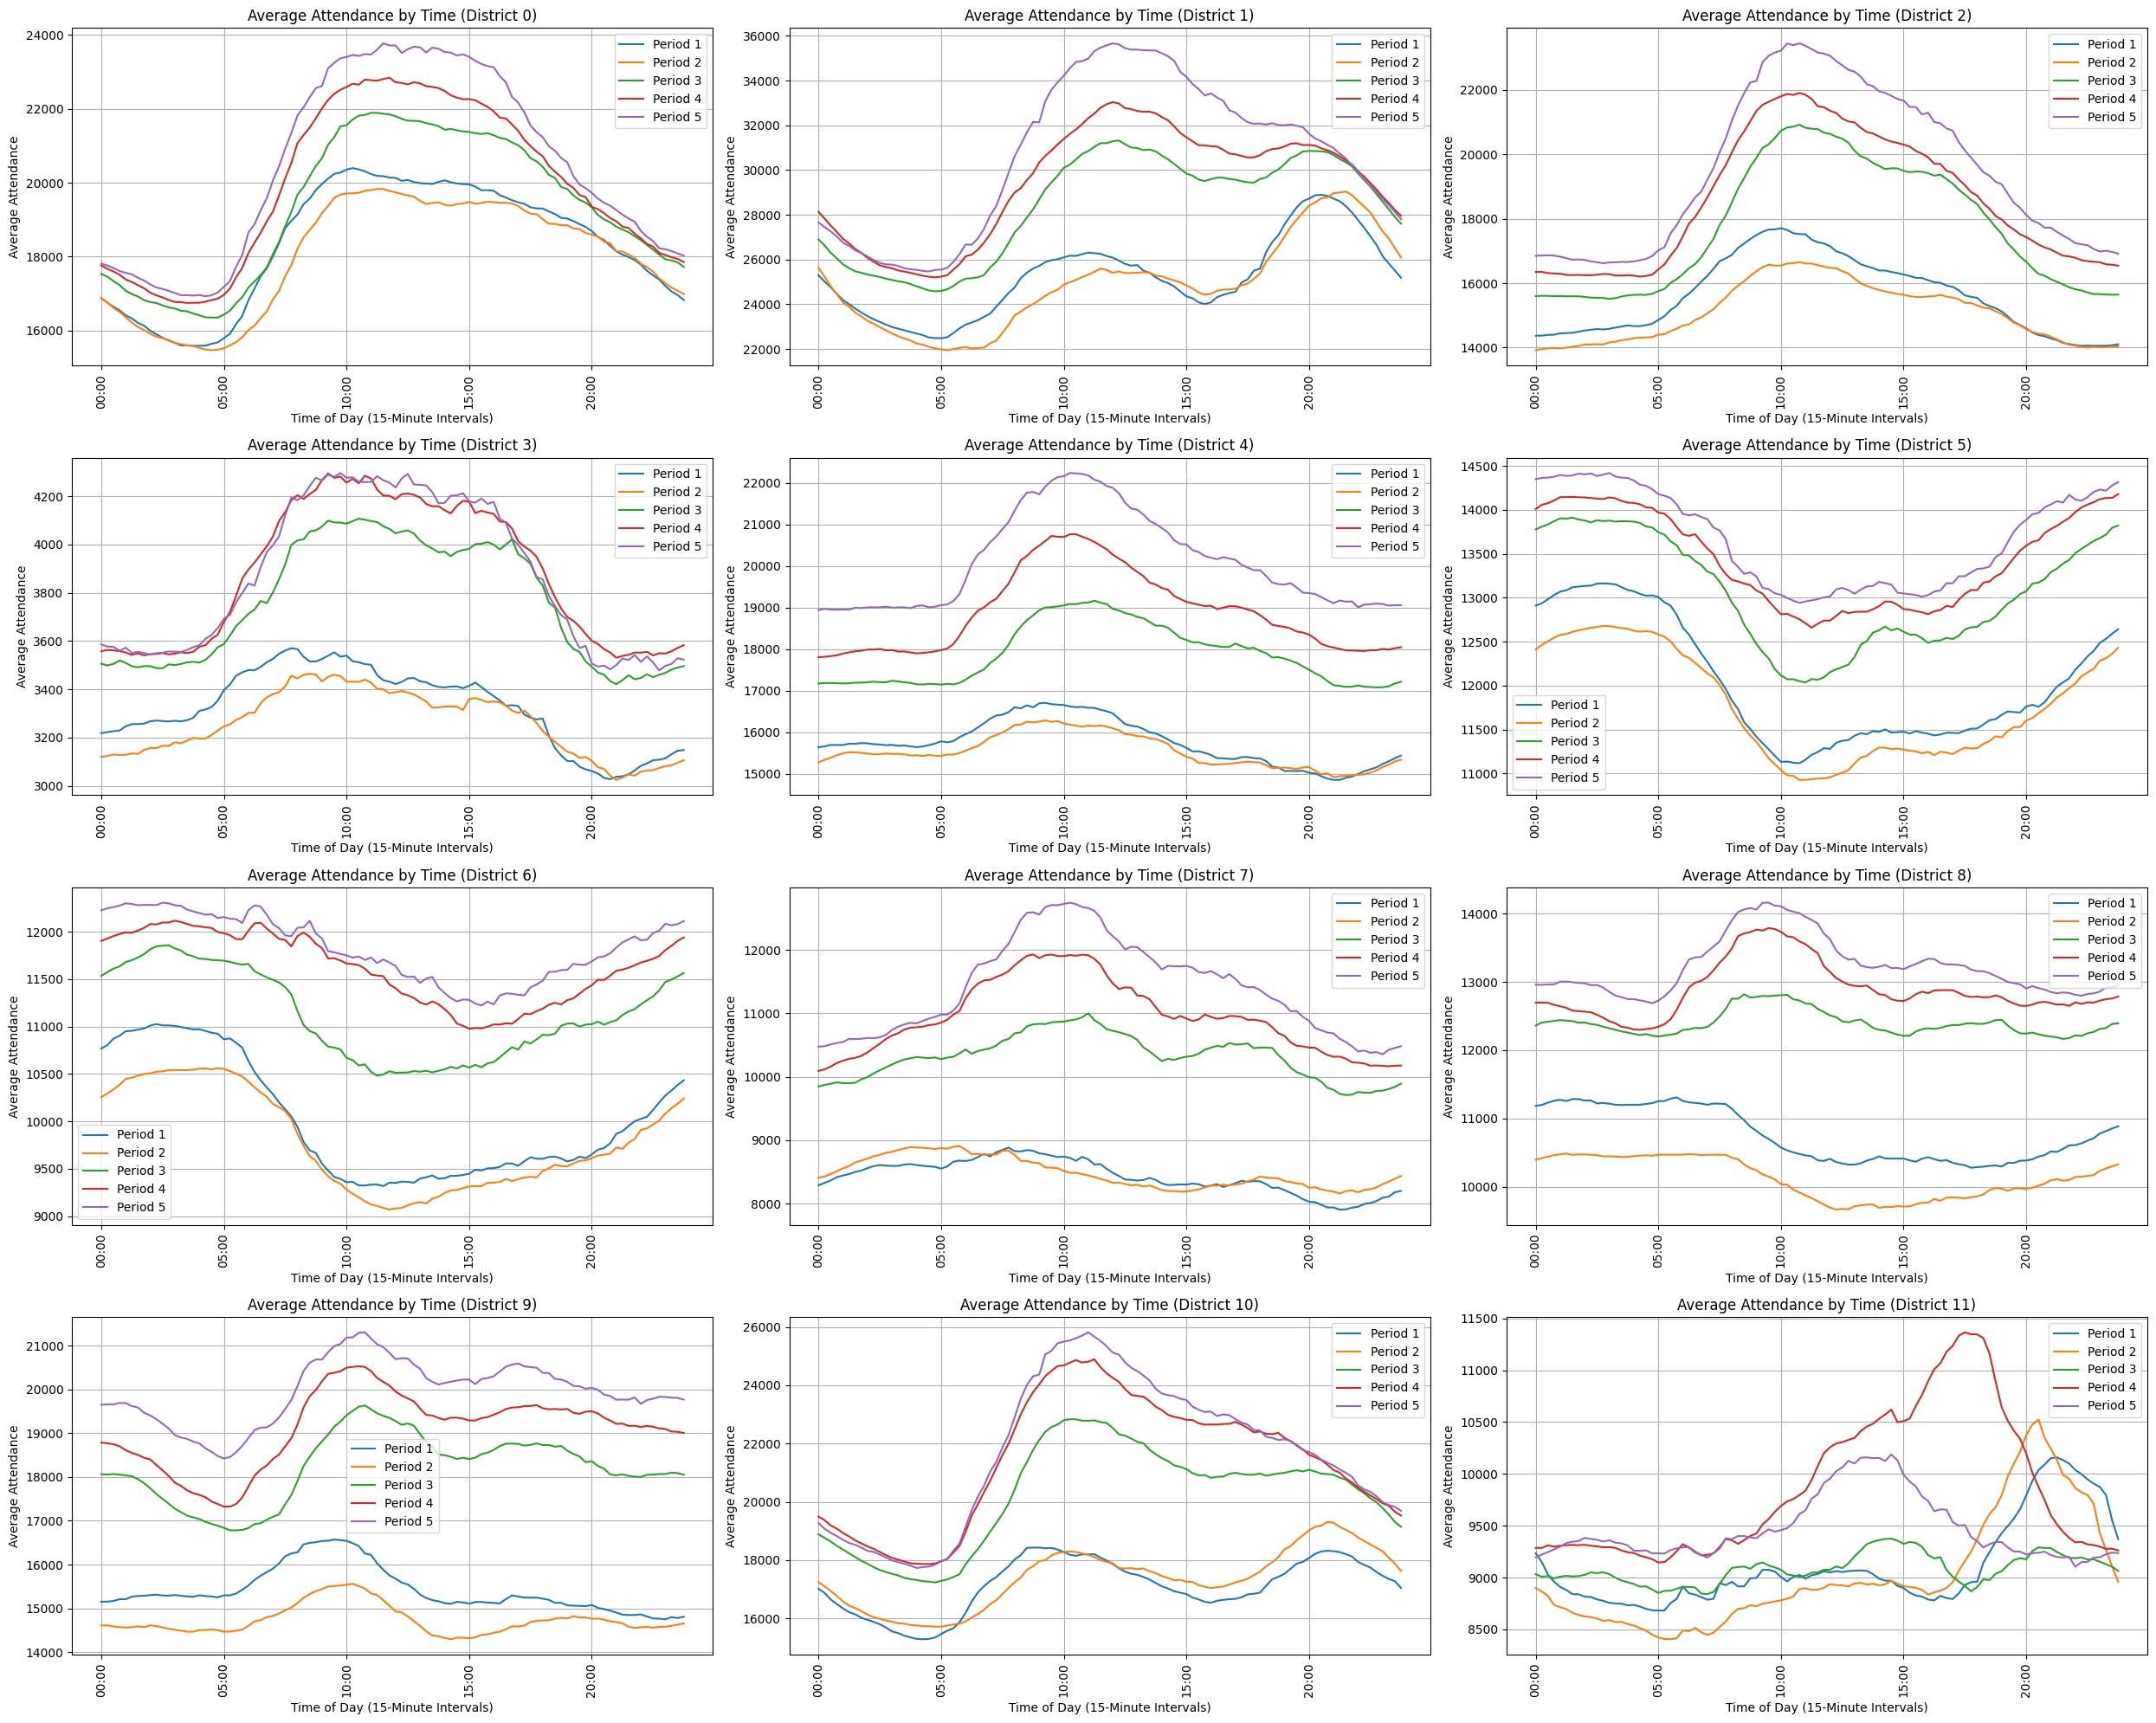

In [13]:
import matplotlib.pyplot as plt
import warnings

new_cols = list(df1.columns)
print(new_cols )

# Suppress any potential warnings
warnings.filterwarnings("ignore")

# Create a 4x3 grid for the subplots (12 plots total, one for each district)
fig, axs = plt.subplots(4, 3, figsize=(25, 20))

# Loop through the districts (Y represents the district)
for Y in range(12):
    # Initialize a list to hold the DataFrame of average attendance for each X
    combined_attendance = pd.DataFrame()

    # Loop through the different time periods (X) for each district Y
    for X in range(1, 6):
        # Convert 'datetime' column to datetime format
        df_dict[f'df_{X}_{Y}']['datetime'] = pd.to_datetime(df_dict[f'df_{X}_{Y}']['datetime'])

        # Create a new column that extracts the time in 15-minute intervals (e.g., 23:45, 00:00, etc.)
        df_dict[f'df_{X}_{Y}']['time_15min'] = df_dict[f'df_{X}_{Y}']['datetime'].dt.strftime('%H:%M')

        # Group by the 15-minute time intervals and calculate the mean value (attendance)
        average_attendance_by_time = df_dict[f'df_{X}_{Y}'].groupby('time_15min')['value'].mean()

        # Append the calculated average to the combined DataFrame, each column representing one period (X)
        combined_attendance[f'Period {X}'] = average_attendance_by_time

    # Determine the grid position for plotting
    ax = axs[Y // 3, Y % 3]

    # Plot the combined data for each district (Y) independently
    combined_attendance.plot(kind='line', ax=ax)

    # Set title and labels for each subplot
    ax.set_title(f'Average Attendance by Time (District {Y})')
    ax.set_xlabel('Time of Day (15-Minute Intervals)')
    ax.set_ylabel('Average Attendance')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


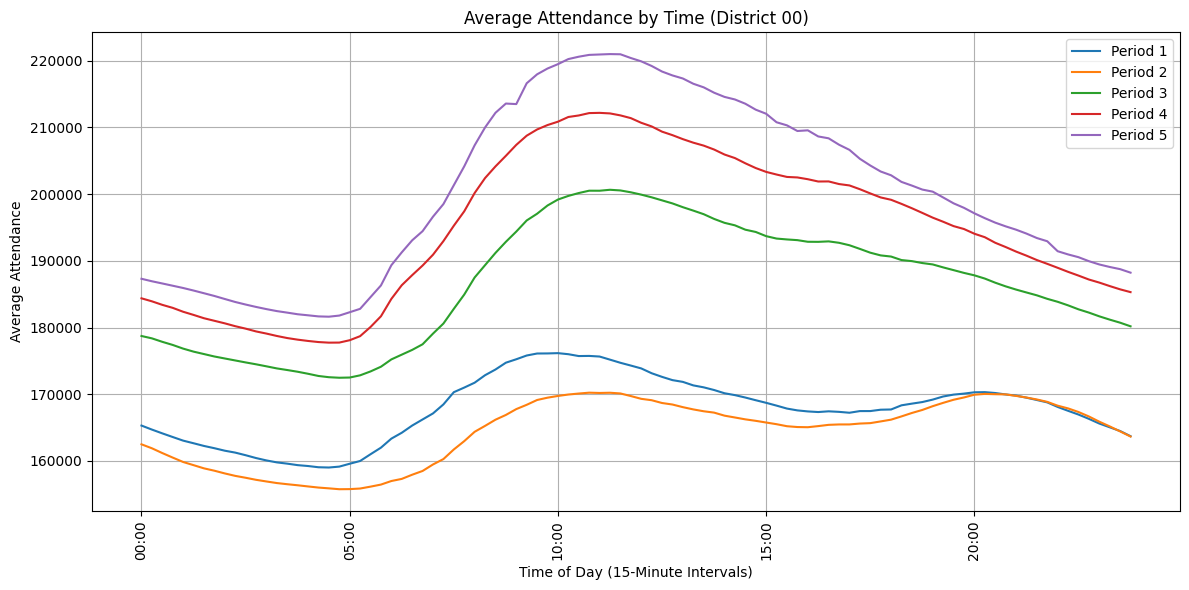

In [14]:
import matplotlib.pyplot as plt
import warnings

# Suppress any potential warnings
warnings.filterwarnings("ignore")

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize a DataFrame to hold the combined average attendance for district 00
combined_attendance = pd.DataFrame()

# Loop through the different time periods (X) for district 00
for X in range(1, 6):
    # Convert 'datetime' column to datetime format
    df_dict[f'df_{X}_00']['datetime'] = pd.to_datetime(df_dict[f'df_{X}_00']['datetime'])

    # Create a new column that extracts the time in 15-minute intervals (e.g., 23:45, 00:00, etc.)
    df_dict[f'df_{X}_00']['time_15min'] = df_dict[f'df_{X}_00']['datetime'].dt.strftime('%H:%M')

    # Group by the 15-minute time intervals and calculate the mean value (attendance)
    average_attendance_by_time = df_dict[f'df_{X}_00'].groupby('time_15min')['value'].mean()

    # Append the calculated average to the combined DataFrame, each column representing one period (X)
    combined_attendance[f'Period {X}'] = average_attendance_by_time

# Plot the combined data for district 00
combined_attendance.plot(kind='line', ax=ax)

# Set title and labels
ax.set_title('Average Attendance by Time (District 00)')
ax.set_xlabel('Time of Day (15-Minute Intervals)')
ax.set_ylabel('Average Attendance')
ax.grid(True)
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()


# Creating  A combined dataset for region 1 as the one that has the most population

In [15]:
import pandas as pd

# List of DataFrames to concatenate
df_list = [df_dict[f'df_{X}_1'] for X in range(1, 6)]

# Concatenate the DataFrames along rows (axis=0)
df_combined = pd.concat(df_list, axis=0, ignore_index=True)

# Display the first few rows of the new combined DataFrame
print(df_combined.size)


26464


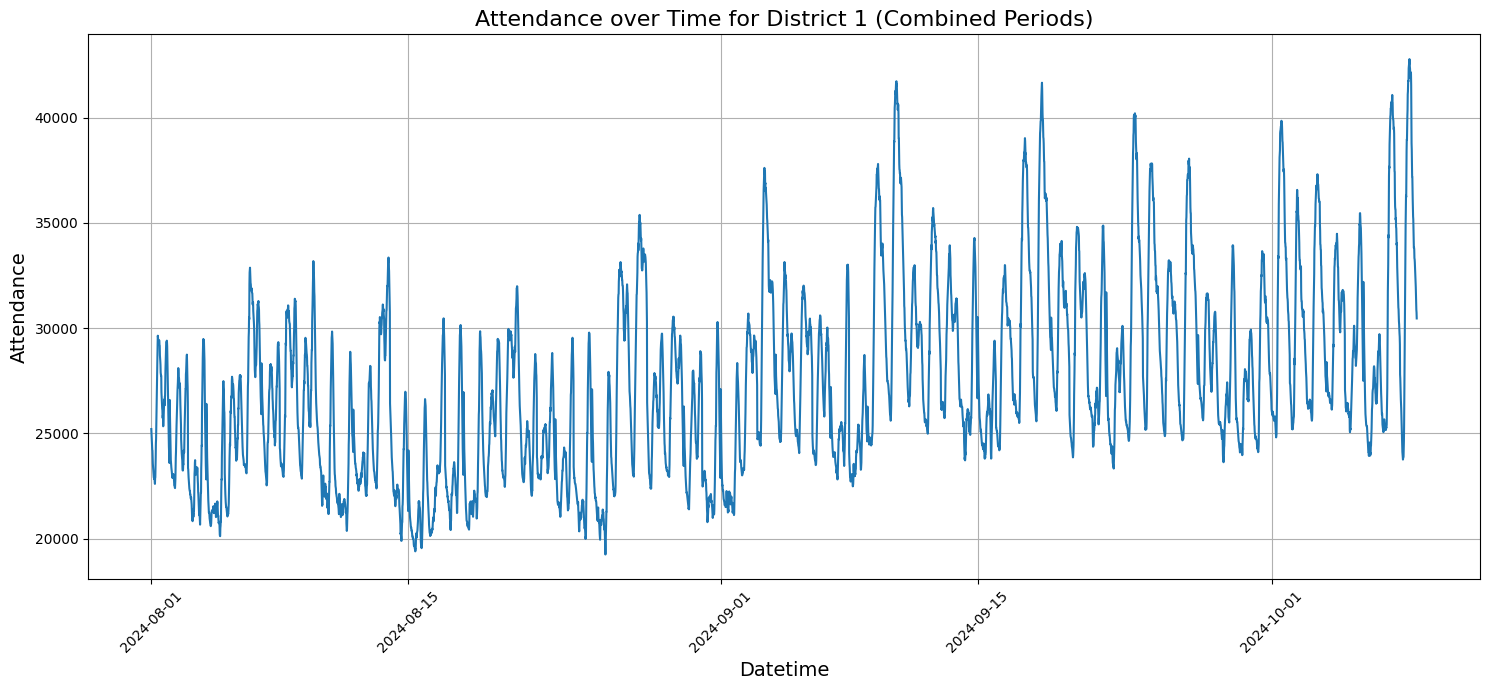

In [16]:
import matplotlib.pyplot as plt

# Ensure that the 'datetime' column is in datetime format
df_combined['datetime'] = pd.to_datetime(df_combined['datetime'])

# Sort the combined DataFrame by datetime, just in case the entries are out of order
df_combined = df_combined.sort_values(by='datetime')

# Plot the data
plt.figure(figsize=(15, 7))

# Plot the 'value' column against 'datetime'
plt.plot(df_combined['datetime'], df_combined['value'], label='Attendance')

# Set the title and labels
plt.title('Attendance over Time for District 1 (Combined Periods)', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Labeling The Data Suited for Training

In [17]:
import pandas as pd
import numpy as np

# Assuming df_combined is already loaded with the 'value' column representing attendance

# Calculate the Z-score for the attendance values
df_combined['z_score'] = (df_combined['value'] - df_combined['value'].mean()) / df_combined['value'].std()

# Define a threshold for labeling anomalies (e.g., absolute Z-score greater than 2)
threshold = 1.5

# Label the data: 1 for anomaly, 0 for normal
df_combined['anomaly_label'] = np.where(np.abs(df_combined['z_score']) > threshold, 1, 0)

# Display the first few rows with the new anomaly label
print(df_combined[['datetime', 'value', 'z_score', 'anomaly_label']].head())


              datetime  value   z_score  anomaly_label
95 2024-08-01 00:00:00  25209 -0.491912              0
94 2024-08-01 00:15:00  24988 -0.541364              0
93 2024-08-01 00:30:00  24808 -0.581642              0
92 2024-08-01 00:45:00  24585 -0.631542              0
91 2024-08-01 01:00:00  24334 -0.687707              0


In [18]:
# Sort the data by datetime just in case
df_combined = df_combined.sort_values(by='datetime')

# Shift the 'value' column to create the label for the next time step
df_combined['next_value'] = df_combined['value'].shift(-1)

# Drop the last row as it will have NaN in the 'next_value' column (since there's no future value for the last point)
df_combined = df_combined.dropna(subset=['next_value'])

# Display the first few rows with the new next_value (target label)
print(df_combined[['datetime', 'value', 'next_value']].head())


              datetime  value  next_value
95 2024-08-01 00:00:00  25209     24988.0
94 2024-08-01 00:15:00  24988     24808.0
93 2024-08-01 00:30:00  24808     24585.0
92 2024-08-01 00:45:00  24585     24334.0
91 2024-08-01 01:00:00  24334     24223.0


In [19]:
# Combining both labels
df_combined['anomaly_label'] = np.where(np.abs(df_combined['z_score']) > threshold, 1, 0)
df_combined['next_value'] = df_combined['value'].shift(-1)
df_combined = df_combined.dropna(subset=['next_value'])

# Display the DataFrame with both labels
print(df_combined[['datetime', 'value', 'next_value', 'anomaly_label']].head())

              datetime  value  next_value  anomaly_label
95 2024-08-01 00:00:00  25209     24988.0              0
94 2024-08-01 00:15:00  24988     24808.0              0
93 2024-08-01 00:30:00  24808     24585.0              0
92 2024-08-01 00:45:00  24585     24334.0              0
91 2024-08-01 01:00:00  24334     24223.0              0


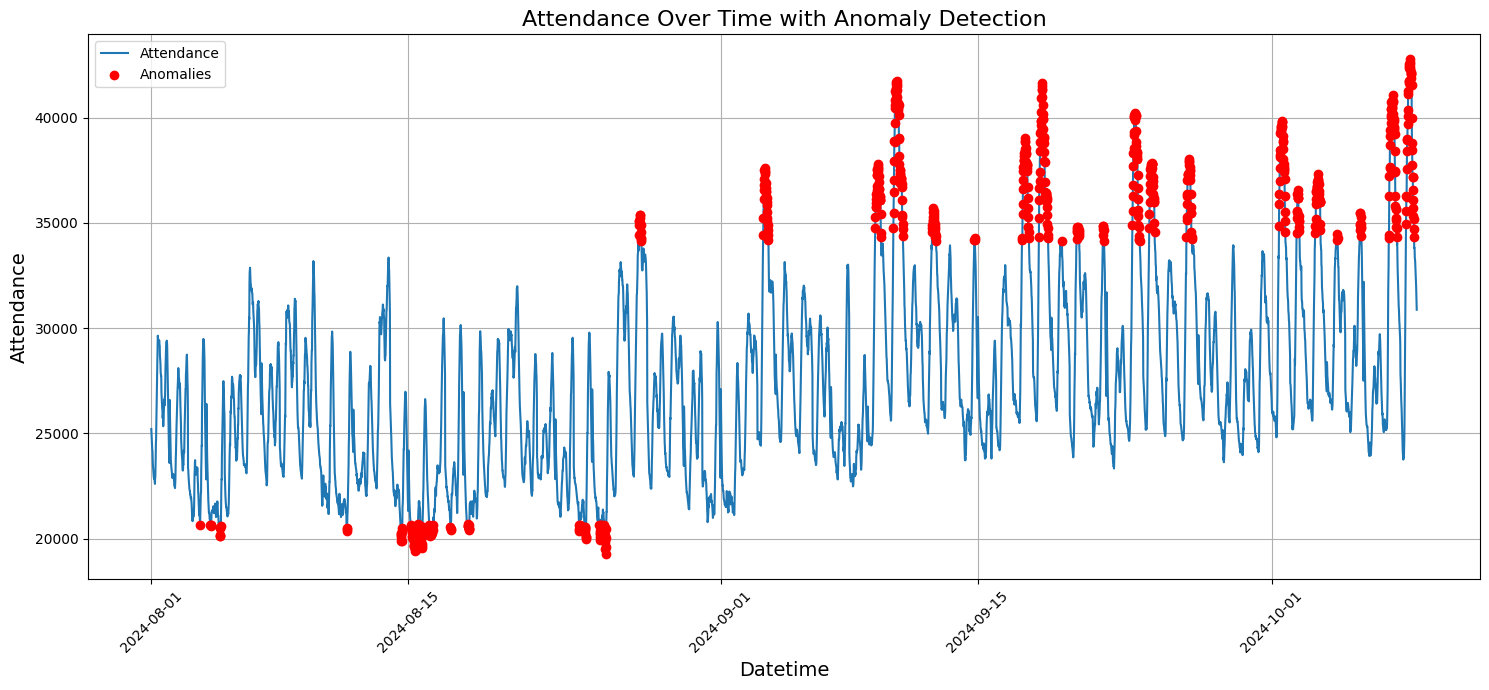

In [20]:
import matplotlib.pyplot as plt

# Plot the labeled dataset, highlighting anomalies
plt.figure(figsize=(15, 7))

# Plot the attendance values over time
plt.plot(df_combined['datetime'], df_combined['value'], label='Attendance')

# Highlight the anomalies
anomalies = df_combined[df_combined['anomaly_label'] == 1]
plt.scatter(anomalies['datetime'], anomalies['value'], color='red', label='Anomalies', zorder=5)

# Set the title and labels
plt.title('Attendance Over Time with Anomaly Detection', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Attendance', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Νέα ενότητα

# QLSTM Training

In [21]:
df_combined.head()

datetime  value     areaAnalisi time_15min   z_score  \
95 2024-08-01 00:00:00  25209  Cagliari - 001      00:00 -0.491912   
94 2024-08-01 00:15:00  24988  Cagliari - 001      00:15 -0.541364   
93 2024-08-01 00:30:00  24808  Cagliari - 001      00:30 -0.581642   
92 2024-08-01 00:45:00  24585  Cagliari - 001      00:45 -0.631542   
91 2024-08-01 01:00:00  24334  Cagliari - 001      01:00 -0.687707   

    anomaly_label  next_value  
95              0     24988.0  
94              0     24808.0  
93              0     24585.0  
92              0     24334.0  
91              0     24223.0

In [4]:
pip install pennylane pennylane-qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.7/340.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 k

In [5]:
pip install keras==2.11.0 tensorflow==2.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: keras
    Found existing installation: kera

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []

    for i in range(len(data) - seq_length):
        # Input sequences
        sequence = data[i:i+seq_length]
        # The target is the next value in the series
        label = data[i+seq_length]
        sequences.append(sequence)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Prepare the dataset (assuming df_combined['value'] contains attendance values)
# Normalize the 'value' column to the range [0, 1]
sequence_length=10
scaler = MinMaxScaler()
df_combined['value'] = scaler.fit_transform(df_combined['value'].values.reshape(-1, 1))
df_combined['next_value'] = scaler.fit_transform(df_combined['next_value'].values.reshape(-1, 1))

X, y = create_sequences(df_combined['value'].values, sequence_length)

# Reshape X to match LSTM input shape (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing datasets (use 80% for training)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [7]:
import pennylane as qml
import tensorflow as tf
from pennylane import numpy as np

# Define the number of qubits
n_qubits = 4
dev = qml.device('default.qubit', wires=n_qubits)

# Define the quantum circuit (QNode)
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))  # Embed classical data
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))  # Apply entangling layers
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]  # Return expectations

# Define the weight shapes for the quantum circuit
weight_shapes = {"weights": (1, n_qubits)}


In [27]:
# Create a Keras layer using the quantum circuit QNode
quantum_model = qml.qnn.KerasLayer(quantum_circuit, weight_shapes, output_dim=n_qubits)

In [28]:
from tensorflow.keras.optimizers import Adam
# Build a simple classical LSTM model combined with the quantum layer
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(sequence_length, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='relu'),
    quantum_model,  # Quantum layer
    tf.keras.layers.Dense(1)  # Output layer (for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
 keras_layer (KerasLayer)    (None, 4)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17,165
Trainable params: 17,165
Non-trainable params: 0
_________________________________________________________________


Epoch 1/2
133/133 [==============================] - 32s 236ms/step - loss: 0.6609 - val_loss: 0.1818
Epoch 2/2
42/42 [==============================] - 6s 138ms/step - loss: 0.0117
Test Loss: 0.011732284910976887


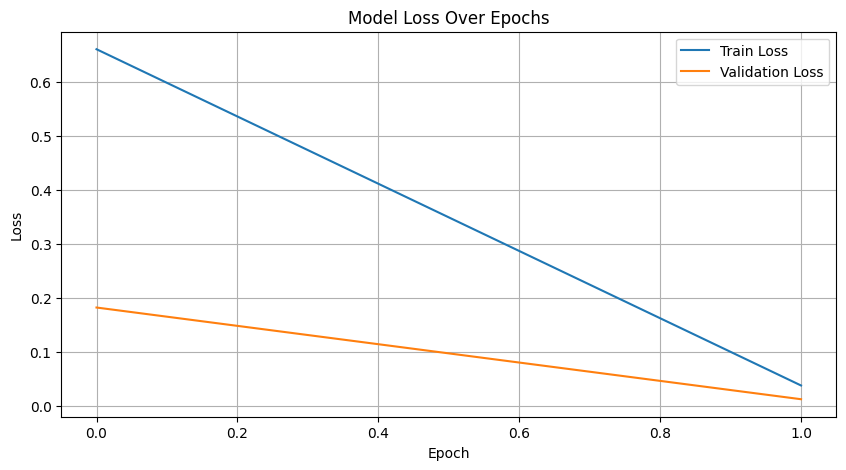

In [29]:
# Import required libraries
import tensorflow as tf

# Assuming X and y are already prepared with the create_sequences function
# X should be the input data, and y should be the target labels (e.g., next time step values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile the model (already done in the model creation step)
# model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2,              # Number of epochs
    batch_size=32,          # Batch size
    validation_split=0.2,   # Use 20% of the training data for validation
    verbose=1               # Display training progress
)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Optionally, plot the training history to visualize the loss over epochs
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Predictions part1

In [35]:
import numpy as np

# Number of future time steps to predict (e.g., 30 days)
num_predictions = 30

# Start with the last available sequence in the data
last_sequence = df_combined['value'].values[-sequence_length:].reshape((1, sequence_length, 1))

# List to store the predicted values
predictions = []

# Iteratively predict the next `num_predictions` values
for _ in range(num_predictions):
    # Predict the next value based on the current sequence
    next_value = model.predict(last_sequence)
    print(next_value)
    # Append the predicted value (scaled back to original value)
    predicted_value = scaler.inverse_transform(next_value)
    print(predicted_value)
    predictions.append(predicted_value[0, 0])

    # Update the sequence by appending the predicted value and removing the oldest value
    # Reshape next_value so that it has the correct dimensions
    next_value_reshaped = np.array([[next_value[0, 0]]]).reshape((1, 1, 1))
    last_sequence = np.append(last_sequence[:, 1:, :], next_value_reshaped, axis=1)

# Convert predictions to a numpy array and print the result
predictions = np.array(predictions)
print(f"Predicted values for the next {num_predictions} steps: {predictions}")


1/1 [==============================] - 0s 177ms/step
[[0.63348186]]
[[0.63348186]]
1/1 [==============================] - 0s 183ms/step
[[0.62668276]]
[[0.62668276]]
1/1 [==============================] - 0s 178ms/step
[[0.62242055]]
[[0.62242055]]
1/1 [==============================] - 0s 177ms/step
[[0.62090003]]
[[0.62090003]]
1/1 [==============================] - 0s 95ms/step
[[0.62157196]]
[[0.62157196]]
1/1 [==============================] - 0s 204ms/step
[[0.62463105]]
[[0.62463105]]
1/1 [==============================] - 0s 249ms/step
[[0.6304792]]
[[0.6304792]]
1/1 [==============================] - 0s 318ms/step
[[0.6382611]]
[[0.6382611]]
1/1 [==============================] - 0s 424ms/step
[[0.6483874]]
[[0.6483874]]
1/1 [==============================] - 0s 328ms/step
[[0.66001177]]
[[0.66001177]]
1/1 [==============================] - 0s 253ms/step
[[0.67260087]]
[[0.67260087]]
1/1 [==============================] - 1s 697ms/step
[[0.6730763]]
[[0.6730763]]
1/1 [========

In [38]:
# Use the scaler to inverse transform back to the original scale
predictions = np.array(predictions).reshape(-1, 1)

original_scale_predictions = scaler.inverse_transform(predictions)

# Print or use the predictions in the original scale
print("Predicted values in the original scale:", original_scale_predictions.flatten())

Predicted values in the original scale: [0.63348186 0.62668276 0.62242055 0.62090003 0.62157196 0.62463105
 0.6304792  0.6382611  0.6483874  0.66001177 0.67260087 0.6730763
 0.67466986 0.67706203 0.6799209  0.682987   0.6860182  0.6887878
 0.6911657  0.69302756 0.69431937 0.6950189  0.69579256 0.6965653
 0.6972852  0.69792044 0.6984564  0.69889    0.69923043 0.69949186]


ValueError: x and y must have same first dimension, but have shapes (6604, 10, 1) and (30, 1)

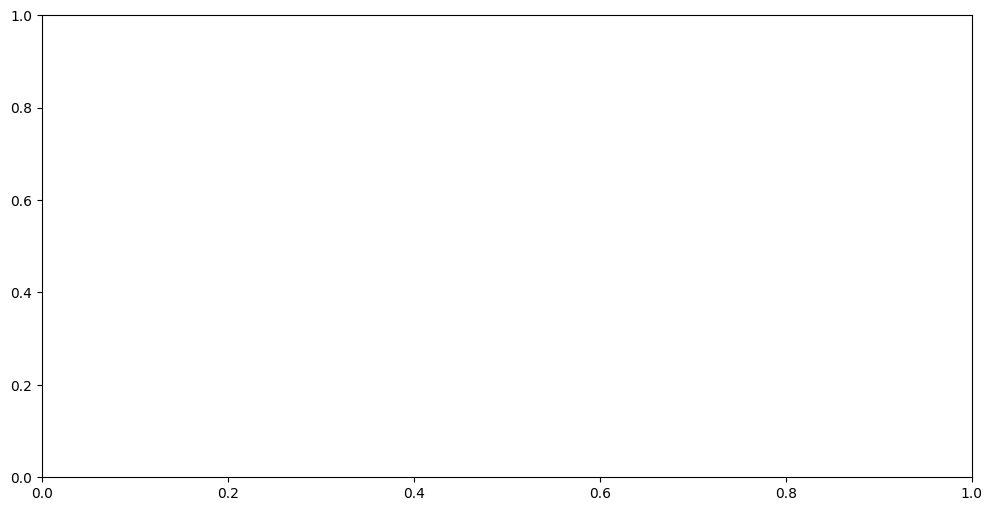

In [39]:
plt.figure(figsize=(12, 6))
# Plot actual data for comparison
plt.plot(df_combined['datetime'], actual_values_rescaled, label='Actual Attendance')

# Generate future dates corresponding to the predictions
last_date = df_combined['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=num_predictions + 1, freq='D')[1:]

# Plot the predicted values
plt.plot(future_dates, predictions_rescaled, label='Predicted Attendance', linestyle='--')

# Set plot labels and title
plt.title('Actual vs Predicted Attendance (2-Month Forecast)')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Predictions part2

In [ ]:
# Initialize parameters
sequence_length = 10  # This should match your LSTM's input sequence length
predictions = []  # To store the predicted values

for i in range(sequence_length, len(df_combined['value']),2):
    # Extract the sequence of the last 'sequence_length' values
    current_sequence = df_combined['value'].values[i-sequence_length:i].reshape((1, sequence_length, 1))

    # Predict the next value in the sequence
    next_value = model.predict(current_sequence)

    print(next_value)

    # Append the predicted value to the predictions list
    predictions.append(next_value[0, 0])

# Inverse the scaling of the predictions (if necessary)
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Trim the actual data to align with the predictions (since predictions start after the initial sequence length)
actual_values_trimmed = df_combined['value'].values[sequence_length:]
actual_values_rescaled = scaler.inverse_transform(actual_values_trimmed.reshape(-1, 1))



Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
1/1 [==============================] - 0s 98ms/step
[[0.64076114]]
1/1 [==============================] - 0s 81ms/step
[[0.6188165]]
1/1 [==============================] - 0s 76ms/step
[[0.56580544]]
1/1 [==============================] - 0s 108ms/step
[[0.48313037]]
1/1 [==============================] - 0s 102ms/step
[[0.37705755]]
1/1 [==============================] - 0s 79ms/step
[[0.26156807]]
1/1 [==============================] - 0s 104ms/step
[[0.22405715]]
1/1 [==============================] - 0s 98ms/step
[[0.18693472]]
1/1 [==============================] - 0s 102ms/step
[[0.1519142]]
1/1 [==============================] - 0s 110ms/step
[[0.12211052]]
1/1 [==============================] - 0s 81ms/step
[[0.09817316]]
1/1 [==============================] - 0s 95ms/step
[[0.07563251]]
1/1 [==============================] - 0s 96ms/step
[[0.05520821]]
1/1 [==============================] - 0s 92ms/step
[[0.03888439]]
1/1 

In [ ]:
# Plot the actual values and the predicted values over the same period
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual attendance (rescaled)
plt.plot(df_combined['datetime'][sequence_length:], actual_values_rescaled, label='Actual Attendance')

# Plot predicted attendance (rescaled)
plt.plot(df_combined['datetime'][sequence_length:], predictions_rescaled, label='Predicted Attendance', linestyle='--')

# Set plot labels and title
plt.title('Actual vs Predicted Attendance (Same Time Period)')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Length of dates: 661
Length of predicted values: 661


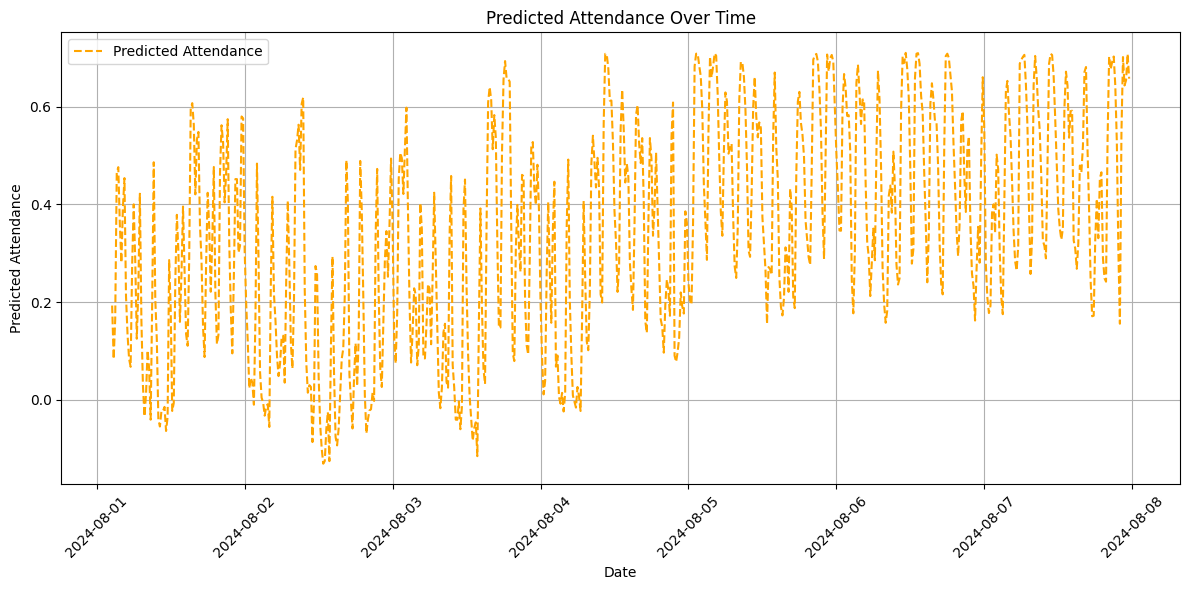

In [47]:
dates_trimmed = df_combined['datetime'].values[sequence_length:len(predictions_rescaled)+sequence_length]

# Ensure that the lengths of the x-axis (dates) and y-axis (predicted values) match
print(f"Length of dates: {len(dates_trimmed)}")
print(f"Length of predicted values: {len(predictions_rescaled)}")

# Plot the predicted values over the same period
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot predicted attendance (rescaled)
plt.plot(dates_trimmed, predictions_rescaled, label='Predicted Attendance', linestyle='--', color='orange')

# Set plot labels and title
plt.title('Predicted Attendance Over Time')
plt.xlabel('Date')
plt.ylabel('Predicted Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Length of dates: 661
Length of actual values: 661
Length of predicted values: 661


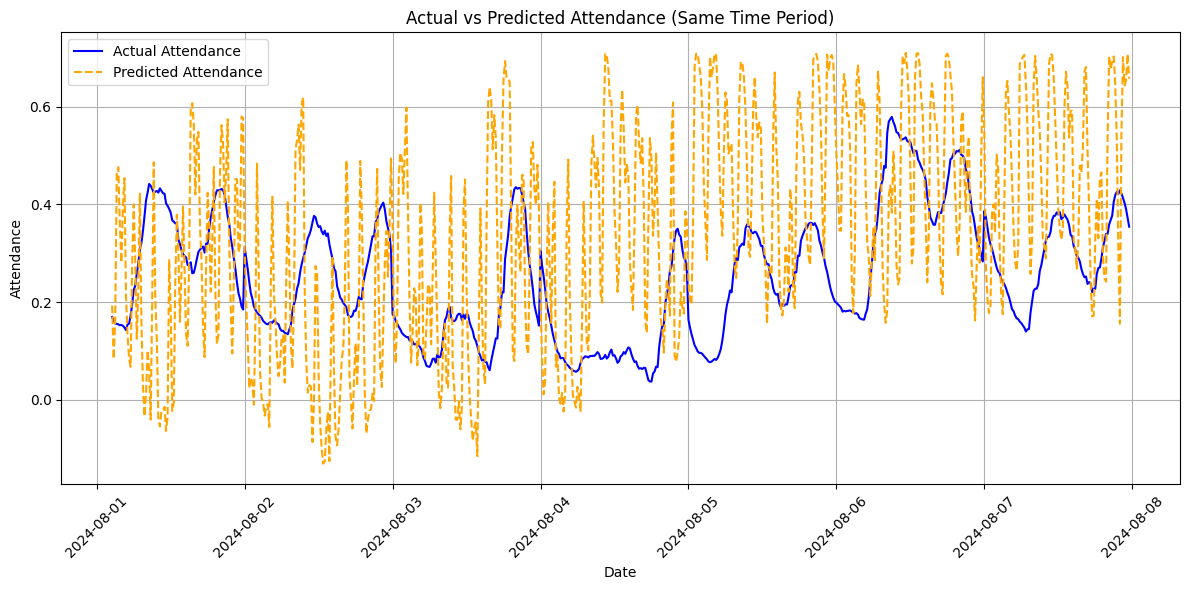

In [48]:
# Inverse the scaling of the predictions (if necessary)
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Trim the datetime and actual values to match the length of the predictions
# dates_trimmed = df_combined['datetime'].values[sequence_length:len(predictions_rescaled) + sequence_length]
actual_values_trimmed = df_combined['value'].values[sequence_length:len(predictions_rescaled)+sequence_length]
actual_values_rescaled = scaler.inverse_transform(actual_values_trimmed.reshape(-1, 1))

# Ensure that the lengths of the x-axis (dates) and y-axis (actual/predicted values) match
print(f"Length of dates: {len(dates_trimmed)}")
print(f"Length of actual values: {len(actual_values_rescaled)}")
print(f"Length of predicted values: {len(predictions_rescaled)}")

# Plot the actual and predicted values over the same period
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual attendance (rescaled)
plt.plot(dates_trimmed, actual_values_rescaled, label='Actual Attendance', color='blue')

# Plot predicted attendance (rescaled)
plt.plot(dates_trimmed, predictions_rescaled, label='Predicted Attendance', linestyle='--', color='orange')

# Set plot labels and title
plt.title('Actual vs Predicted Attendance (Same Time Period)')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Length of dates: 6604
Length of actual values: 6604
Length of predicted values: 3302


ValueError: x and y must have same first dimension, but have shapes (6604,) and (3302, 1)

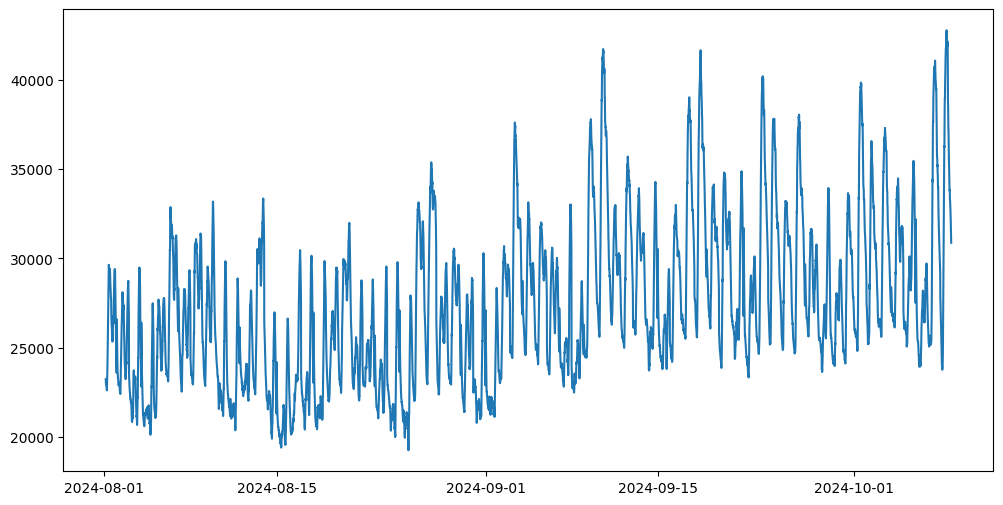

In [ ]:
# Inverse the scaling of the predictions (if necessary)
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Trim the actual data to align with the predictions (since predictions start after the initial sequence length)
actual_values_trimmed = df_combined['value'].values[sequence_length:]
actual_values_rescaled = scaler.inverse_transform(actual_values_trimmed.reshape(-1, 1))

# Trim the datetime column to match the length of the actual and predicted values
dates_trimmed = df_combined['datetime'].values[sequence_length:]

# Ensure that the lengths of the x-axis (dates) and y-axis (actual/predicted values) match
print(f"Length of dates: {len(dates_trimmed)}")
print(f"Length of actual values: {len(actual_values_rescaled)}")
print(f"Length of predicted values: {len(predictions_rescaled)}")

# Plot the actual values and the predicted values over the same period
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual attendance (rescaled)
plt.plot(dates_trimmed, actual_values_rescaled, label='Actual Attendance')

# Plot predicted attendance (rescaled)
plt.plot(dates_trimmed, predictions_rescaled, label='Predicted Attendance', linestyle='--')

# Set plot labels and title
plt.title('Actual vs Predicted Attendance (Same Time Period)')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

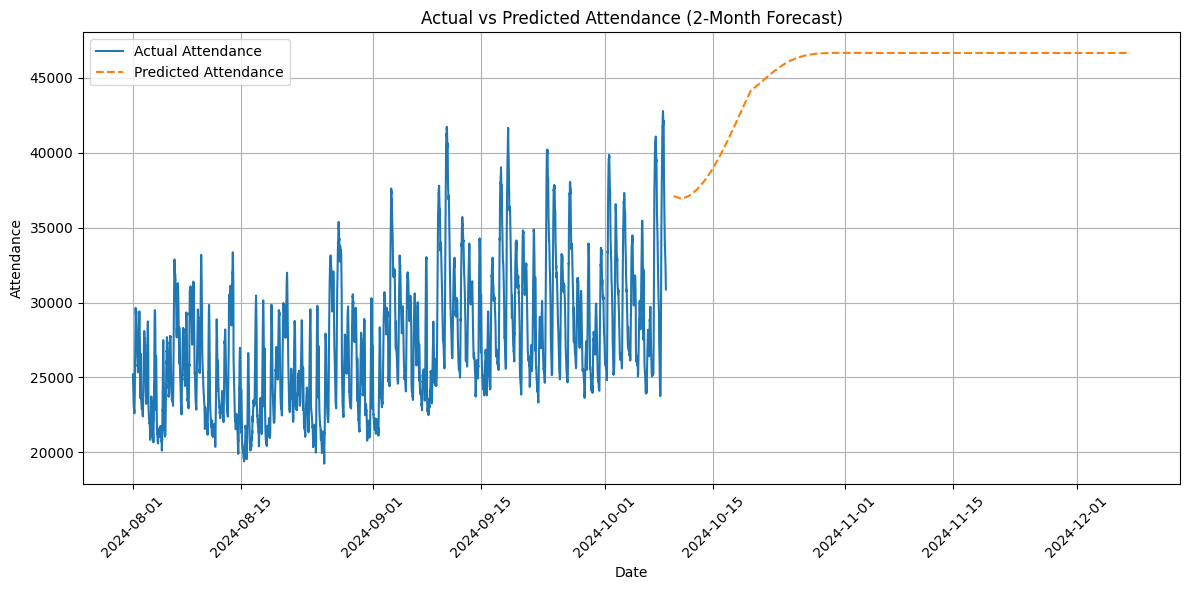

In [ ]:
plt.figure(figsize=(12, 6))
# Plot actual data for comparison
plt.plot(df_combined['datetime'], actual_values_rescaled, label='Actual Attendance')

# Generate future dates corresponding to the predictions
last_date = df_combined['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=num_predictions + 1, freq='D')[1:]

# Plot the predicted values
plt.plot(future_dates, predictions_rescaled, label='Predicted Attendance', linestyle='--')

# Set plot labels and title
plt.title('Actual vs Predicted Attendance (2-Month Forecast)')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 101ms/step
[[31316.01 ]
 [31155.506]
 [30995.428]
 [30843.768]
 [30695.848]
 [30557.   ]
 [30435.834]
 [30324.004]
 [30233.316]
 [30158.875]
 [30103.473]
 [30007.371]
 [29917.582]
 [29834.2  ]
 [29756.64 ]
 [29684.734]
 [29617.938]
 [29555.1  ]
 [29495.742]
 [29438.508]
 [29382.443]
 [29326.396]
 [29273.678]
 [29223.936]
 [29176.82 ]
 [29132.033]
 [29089.307]
 [29048.404]
 [29009.186]
 [28971.523]
 [28935.402]
 [28900.861]
 [28868.008]
 [28836.7  ]
 [28806.816]
 [28778.266]
 [28750.967]
 [28724.871]
 [28699.926]
 [28676.092]
 [28653.33 ]
 [28631.607]
 [28610.88 ]
 [28591.098]
 [28572.2  ]
 [28554.154]
 [28536.92 ]
 [28520.465]
 [28504.76 ]
 [28489.766]
 [28475.457]
 [28461.8  ]
 [28448.766]
 [28436.326]
 [28424.451]
 [28413.117]
 [28402.303]
 [28391.982]
 [28382.133]
 [28372.734]]


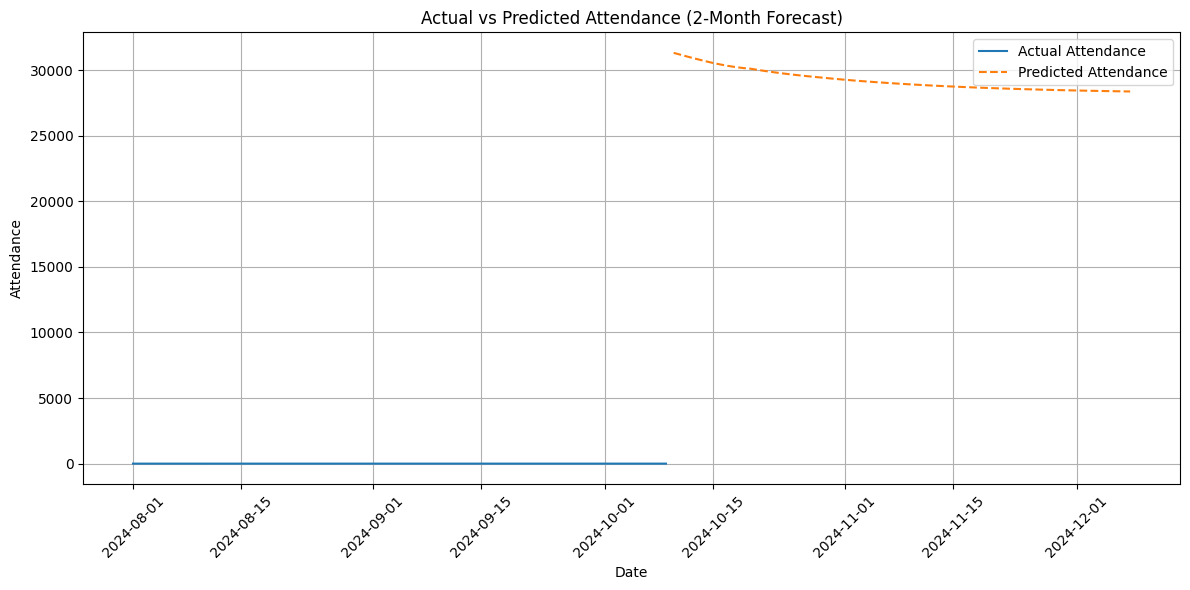

In [ ]:
import matplotlib.pyplot as plt

# Plot the last part of the actual data
plt.figure(figsize=(12, 6))

# Plot actual data for comparison
plt.plot(df_combined['datetime'], df_combined['value'], label='Actual Attendance')

# Generate future dates corresponding to the predictions
import pandas as pd
last_date = df_combined['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=num_predictions + 1, freq='D')[1:]

# Plot the predicted values
plt.plot(future_dates, predictions_rescaled, label='Predicted Attendance', linestyle='--')

# Set plot labels and title
plt.title('Actual vs Predicted Attendance (2-Month Forecast)')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(df_combined['value'].describe())  # Summary statistics
print(df_combined['value'].head())  # First few rows


count    6614.000000
mean        0.346596
std         0.189964
min         0.000000
25%         0.202841
50%         0.315085
75%         0.463797
max         1.000000
Name: value, dtype: float64
95    0.253198
94    0.243805
93    0.236154
92    0.226676
91    0.216007
Name: value, dtype: float64


### QItaly Analysis

In [ ]:
import matplotlib.pyplot as plt

# List of filtered datasets (df0 for each dataset)
filtered_datasets = [
    df_dict['df_1_0'],
    df_dict['df_2_0'],
    df_dict['df_3_0'],
    df_dict['df_4_0'],
    df_dict['df_5_0']
]

# Corresponding titles for each dataset
# Fix the titles in chronological order
titles = [
    "Normalized Data Trends Over Time / Whole Town - Aug 1 to Aug 14, 2024",
    "Normalized Data Trends Over Time / Whole Town - Aug 15 to Aug 31, 2024",
    "Normalized Data Trends Over Time / Whole Town - Sep 1 to Sep 14, 2024",
    "Normalized Data Trends Over Time / Whole Town - Sep 15 to Sep 30, 2024",
    "Normalized Data Trends Over Time / Whole Town - Oct 1 to Oct 8, 2024"
]

# Loop through each dataset and generate the plot
for idx, df0 in enumerate(filtered_datasets):
    fig = plt.figure(figsize=(20, 12))

    # Define grid layout
    gs = fig.add_gridspec(2, 2)

    # 1. Line plots of all numeric columns
    ax1 = fig.add_subplot(gs[0, :])  # Top row, full width

    # Assuming 'new_cols' contains numeric columns to plot (excluding index or non-numeric ones)
    new_cols0 = new_cols[1:-1]

    # Plot each numeric column
    for column in new_cols0:
        # Normalize data to make trends comparable
        normalized_data = (df0[column] - df0[column].min()) / \
                         (df0[column].max() - df0[column].min())
        ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

    ax1.set_title(titles[idx], pad=20)
  # Label for the x-axis to represent datetime (time)
    ax1.set_xlabel('Datetime (Time)', fontsize=12)

    # Label for the y-axis representing normalized values
    ax1.set_ylabel('Normalized Values')

    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

In [ ]:
dfmulti=df_dict['df_1_1'].copy()

dfmulti = dfmulti.drop('areaAnalisi', axis=1)

dfmulti =dfmulti.rename(columns={'value': 'ACE01'})

f_column = df_dict['df_1_2']["value"].to_numpy()
dfmulti["ACE02"]=f_column

f_column = df_dict['df_1_3']["value"].to_numpy()
dfmulti["ACE03"]=f_column

f_column = df_dict['df_1_4']["value"].to_numpy()
dfmulti["ACE04"]=f_column

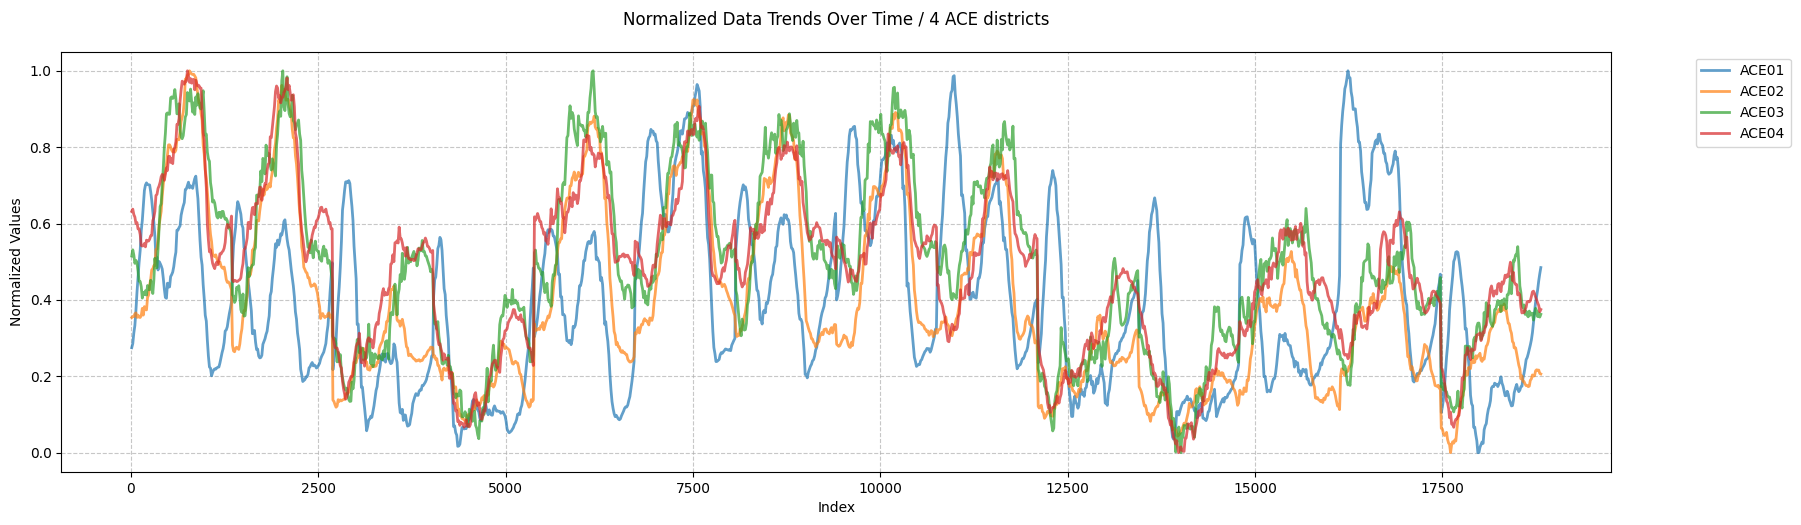

In [ ]:
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width


cols=["ACE01","ACE02", "ACE03", "ACE04"]
# Plot each numeric column
for column in cols:
    # Normalize data to make trends comparable
    normalized_data = (dfmulti[column] - dfmulti[column].min()) / \
                     (dfmulti[column].max() - dfmulti[column].min())
    ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time / 4 ACE districts', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

In [ ]:
dfmulti2=df_dict['df_1_5'].copy()
dfmulti2 = dfmulti2.drop('areaAnalisi', axis=1)
dfmulti2 =dfmulti2.rename(columns={'value': 'ACE05'})

f_column = df_dict['df_1_6']["value"].to_numpy()
dfmulti2["ACE06"]=f_column

f_column = df_dict['df_1_7']["value"].to_numpy()
dfmulti2["ACE07"]=f_column

f_column = df_dict['df_1_8']["value"].to_numpy()
dfmulti2["ACE08"]=f_column

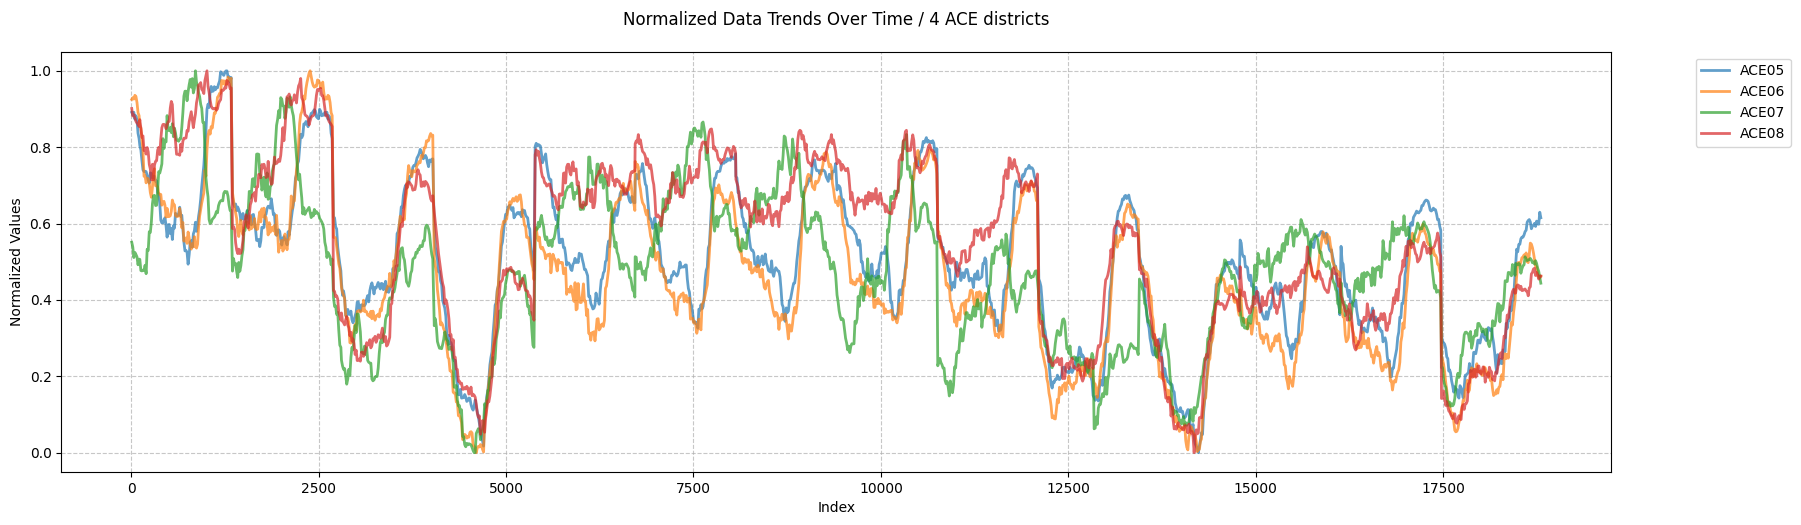

In [ ]:
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width


cols=["ACE05","ACE06", "ACE07", "ACE08"]
# Plot each numeric column
for column in cols:
    # Normalize data to make trends comparable
    normalized_data = (dfmulti2[column] - dfmulti2[column].min()) / \
                     (dfmulti2[column].max() - dfmulti2[column].min())
    ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time / 4 ACE districts', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

In [ ]:
dfmulti3=df_dict['df_1_9'].copy()
dfmulti3 = dfmulti3.drop('areaAnalisi', axis=1)
dfmulti3 =dfmulti3.rename(columns={'value': 'ACE09'})

f_column = df_dict['df_1_10']["value"].to_numpy()
dfmulti3["ACE10"]=f_column

f_column = df_dict['df_1_11']["value"].to_numpy()
dfmulti3["ACE11"]=f_column

f_column = df_dict['df_1_12']["value"].to_numpy()
dfmulti3["ACE12"]=f_column

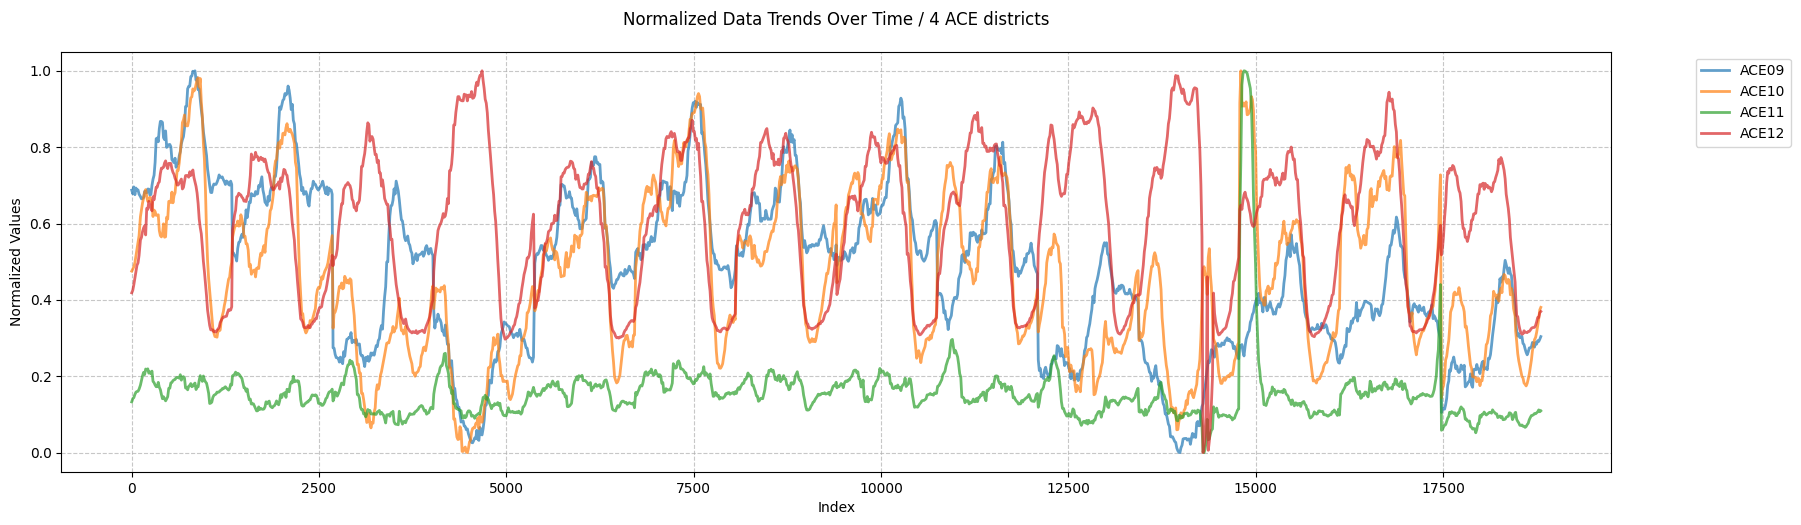

In [ ]:
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width


cols=["ACE09","ACE10", "ACE11", "ACE12"]
# Plot each numeric column
for column in cols:
    # Normalize data to make trends comparable
    normalized_data = (dfmulti3[column] - dfmulti3[column].min()) / \
                     (dfmulti3[column].max() - dfmulti3[column].min())
    ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time / 4 ACE districts', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)